# TASK: Wheather prediction - will be the RAIN tommorow?
(use LogRegression)

In [1]:
import numpy as np
import pandas as pd


In [36]:
df = pd.read_csv('weatherAUS.csv')

In [37]:
df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

In [38]:
# заменили yes = 1, no = 0
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes' : 1.0, 'No':0.0})
df['RainToday'] = df['RainToday'].map({'Yes' : 1.0, 'No':0.0})

In [39]:
# delete Nan
df = df[df['RainTomorrow'] == df['RainTomorrow']]

In [40]:
df


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,0.0,0.0
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0.0,0.0
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0.0,0.0
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0.0,0.0


In [41]:
#процент дней, когда есть дождь
df['RainTomorrow'].sum()/df.shape[0]

0.22418121848473554

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null   fl

In [43]:
y = df.RainTomorrow 
X = df.drop(columns = ['RainTomorrow'] )

In [44]:
#удалим столбцы с категориальными признаками
X = X.select_dtypes([np.number])

In [45]:
X

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,NaN,NaN,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,0.0
145455,2.8,23.4,0.0,NaN,NaN,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0.0
145456,3.6,25.3,0.0,NaN,NaN,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0.0
145457,5.4,26.9,0.0,NaN,NaN,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0.0


In [46]:
X.median()

MinTemp            12.0
MaxTemp            22.6
Rainfall            0.0
Evaporation         4.8
Sunshine            8.5
WindGustSpeed      39.0
WindSpeed9am       13.0
WindSpeed3pm       19.0
Humidity9am        70.0
Humidity3pm        52.0
Pressure9am      1017.6
Pressure3pm      1015.2
Cloud9am            5.0
Cloud3pm            5.0
Temp9am            16.7
Temp3pm            21.1
RainToday           0.0
dtype: float64

In [48]:
X = X.fillna(X.median())



In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) #test_size - процент данных в тестовой выборке
model = LogisticRegression(solver = 'lbfgs', max_iter = 1000)
model.fit(X_train, y_train)

/home/vbva/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [53]:
y_pred = model.predict(X_test)

In [54]:
(y_pred == y_test).sum()/len(y_test)

0.8416240798912279

In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test, y_pred)

0.8416240798912279

In [60]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[31300,  1788],
       [ 4968,  4602]])

Text(0.5, 23.52222222222222, 'Predicted label')

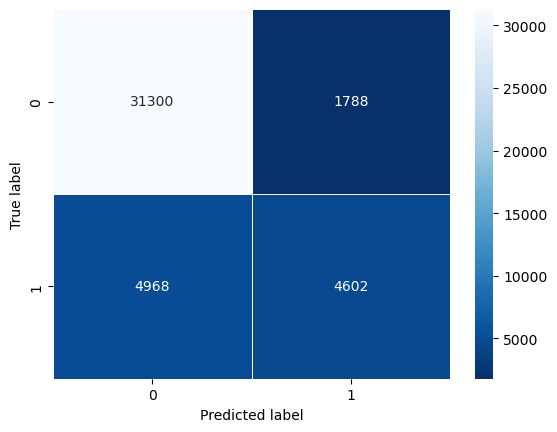

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.heatmap(conf_matrix, annot = True, fmt = '.0f', linewidths = 0.5, cmap = 'Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [64]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 933.5 kB/s eta 0:00:001.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


# Метрики оценки полученной модели

In [71]:
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]
TN = conf_matrix[0,0]

# процент правильных предсказаний
accuracy = (TP+TN)/(TP+FN+FP+TN)
accuracy

0.8416240798912279

In [73]:
# если модель сказала, что дождь - насколько мы ей доверяем
precision = TP / (TP + FP)
precision

0.72018779342723

In [74]:
#какое кол-во случаев дождя мы детектировали (полнота)
recall = TP/(TP+FN)
recall

0.4808777429467085

In [75]:
f_score = 2.0 / (1/precision + 1/recall)
f_score

0.5766917293233083

In [77]:
# вероятность класса 
y_proba = model.predict_proba(X_test)[:,1]

Text(0.5, 1.0, 'ROC-curve')

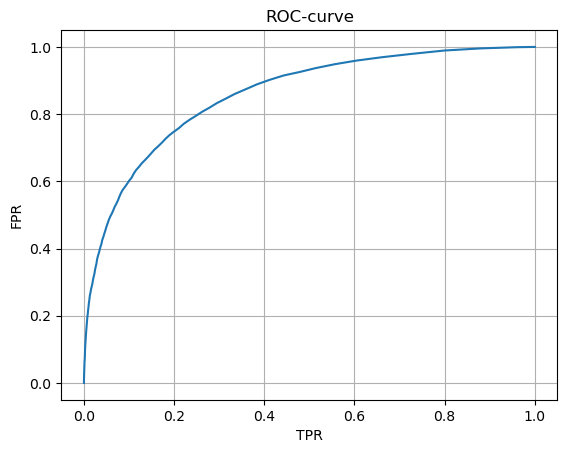

In [79]:
alpha_list = np.linspace(0,1,100)
tpr = []
fpr = []

for alpha in alpha_list:
    y_pred = y_proba > alpha
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    TP = conf_matrix[1,1]
    FN = conf_matrix[1,0]
    FP = conf_matrix[0,1]
    TN = conf_matrix[0,0]

    curr_tpr =  TP/(TP+FN)
    curr_fpr = FP / (FP + TN)

    tpr.append(curr_tpr)
    fpr.append(curr_fpr)
tpr = np.array(tpr)
fpr = np.array(fpr)

plt.plot(fpr, tpr)
plt.ylabel('FPR')
plt.xlabel('TPR')
plt.grid()
plt.title('ROC-curve')
    

In [81]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_proba)
auc

0.8579546575649444